In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps

# Import API key
from api_keys import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [2]:
# Store csv path ad name
csv = ("Resources/Cleaned_VCE_results_by_school.csv")

# Read in csv file
school_df = pd.read_csv(csv) 

In [3]:
school_df.head(10)

,School Name,Suburb,Type,Sector,Geolocation,Latitude,Longitude,VET Certs With 2021 Enrolments,% Applying for Tertiary Study,Median VCE Score,VCE 40+ %
0,Academy of Mary Immaculate,Fitzroy,Secondary,Non-Gov,Major Cities,-37.8037,144.974,10,94.0,30,6.5
1,Adass Israel School,Elsternwick,Combined,Non-Gov,Major Cities,-37.8839,145.008,3,0.0,0,0.0
2,Aitken College,Greenvale,Combined,Non-Gov,Major Cities,-37.6274,144.888,21,94.2,28,2.7
3,Al Iman College,Melton South,Combined,Non-Gov,Major Cities,-37.7070,144.565,0,35.7,26,3.9
4,Al Siraat College,Epping,Combined,Non-Gov,Major Cities,-37.6243,145.038,2,95.0,30,4.6
5,Albert Park College,Albert Park,Secondary,Gov,Major Cities,-37.8444,144.947,23,85.8,30,9.0
6,Alexandra Secondary College,Alexandra,Secondary,Gov,Inner Regional,-37.1945,145.701,7,69.6,26,0.8
7,Alia College,Hawthorn East,Secondary,Non-Gov,Major Cities,-37.8432,145.045,2,25.0,24,0.0
8,Alice Miller School,Macedon,Combined,Non-Gov,Inner Regional,-37.4466,144.532,2,75.0,35,14.2
9,Alkira Secondary College,Cranbourne North,Secondary,Gov,Major Cities,-38.0733,145.311,35,81.5,29,3.5


# Geolocation visulaisation
This section provides an overarching investigation into the distributuion of where Vicotrian schools are located based on geolocation. A breakdown of hwhat percent of schools are located in different geolocations as well as a box plot showing a count of schools per geolocation are provided to visualise the data. Heatmaps of where schools are concentrated and located based on geolocation are also provided utlising the google maps API. Within this secion there is:
* Geolocations percentage of schools
* Geolocation count of schools box plot
* Victorian school heat map
* Heat map for each geolocation's schools

In [4]:
#Count of each school in each geo location and calculate geolocation's count percentage
geo_schools_gb = school_df.groupby(['Geolocation'])
schools_sort_size = pd.DataFrame(geo_schools_gb.size())
schools_sort_size.columns = ["Count"]
schools_sort_size ["Percentage"] = (100*(schools_sort_size['Count']/schools_sort_size['Count'].sum()))
schools_sort_size

,Count,Percentage
Geolocation,,
Inner Regional,83,21.957672
Major Cities,252,66.666667
Outer Regional,39,10.317460
Remote,4,1.058201


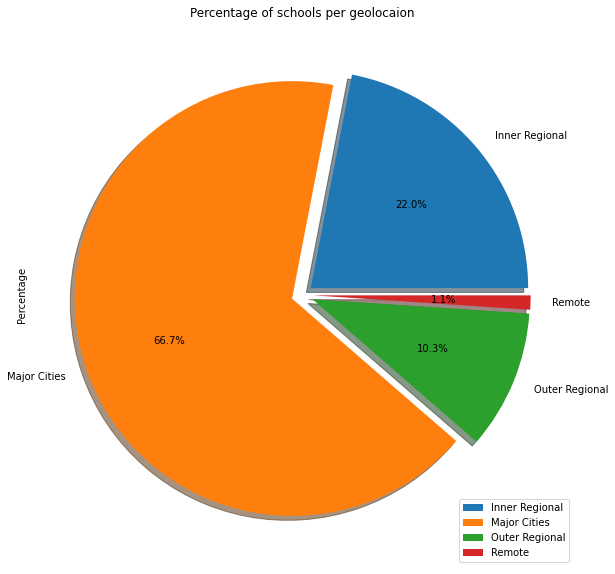

In [5]:
#Percentage of all schools in Victoria per Geolocation
schools_sort_size.plot.pie(y= 'Percentage' ,figsize=(10,10), explode=( 0.05,0.05,0.05,0.05),
        labels=("Inner Regional", "Major Cities", "Outer Regional", "Remote"),shadow= True, autopct="%1.1f%%")
plt.title('Percentage of schools per geolocaion')
plt.savefig('output/schools_perc_pie.png')
plt.show()

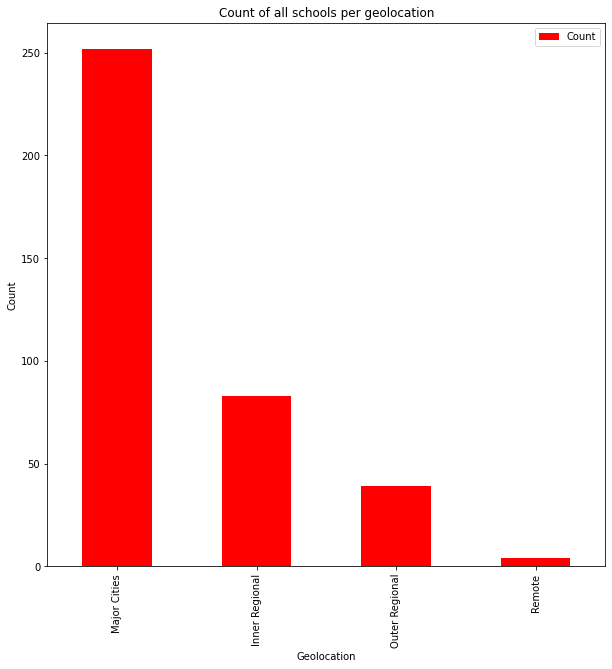

In [6]:
#Count of all schools in Victoria per Geolocation
schools_sort_size_bar = schools_sort_size.drop(schools_sort_size.columns[1],axis=1,)
schools_sort_size_bar = schools_sort_size_bar.sort_values('Count', ascending= False)
schools_sort_size_bar.plot.bar(ylabel= 'Count',color='r',title = 'Count of all schools per geolocation' ,figsize=(10,10), align='center')
plt.savefig('output/schools_count_bar.png')
plt.show()

In [18]:
#School location heatmap
locations = school_df[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:

Inner_Regional_data = school_df.loc[(school_df['Geolocation'] == 'Inner Regional')]
locations = Inner_Regional_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
Major_Cities_data = school_df.loc[(school_df['Geolocation'] == 'Major Cities')]
locations = Major_Cities_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
Outer_Regional_data = school_df.loc[(school_df['Geolocation'] == 'Outer Regional')]
locations = Outer_Regional_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
Remote_data = school_df.loc[(school_df['Geolocation'] == 'Remote')]
locations = Remote_data[["Latitude", "Longitude"]].astype(float)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))

# Geolocation School Diversity
This section investigates access to educational resources based on geolocation. Counting school types and Sector. Also looking at a better data set of percentages for school type and sector for each geolocation:
* Each geolocation school type count, pie chart or histogram
* Each geolocation sector count, pie histogram
* Percentage of school type, histogram for geolocation
* Percentage of sector, histogram for geolocaiton
##### Academic sucess in Sector
since this is less directly relavent to the analysis it might be skiped but it could provide good information if sector does infact have an affect on academic sucess:
* Meadian study score box chart, gov, non-gov
* 40%+ gov non gov box chart
* bin of % Applying for Tertiary Study 

# Geolocaiton and Academic Sucess
This section investigates if geolocation does have an affect on academic success:
* Geolocation median ATAR box plots (as seen bellow, hopefully without null values)
* 40%+ geolocation box chart
* bin for % applying for tertiary study
* VET Certs With 2021 Enrolments
* Top 100 median VCE scores histogram 
* Top 100 median VCE scores heatmap

<AxesSubplot:title={'center':'Median VCE Score'}, xlabel='Geolocation'>

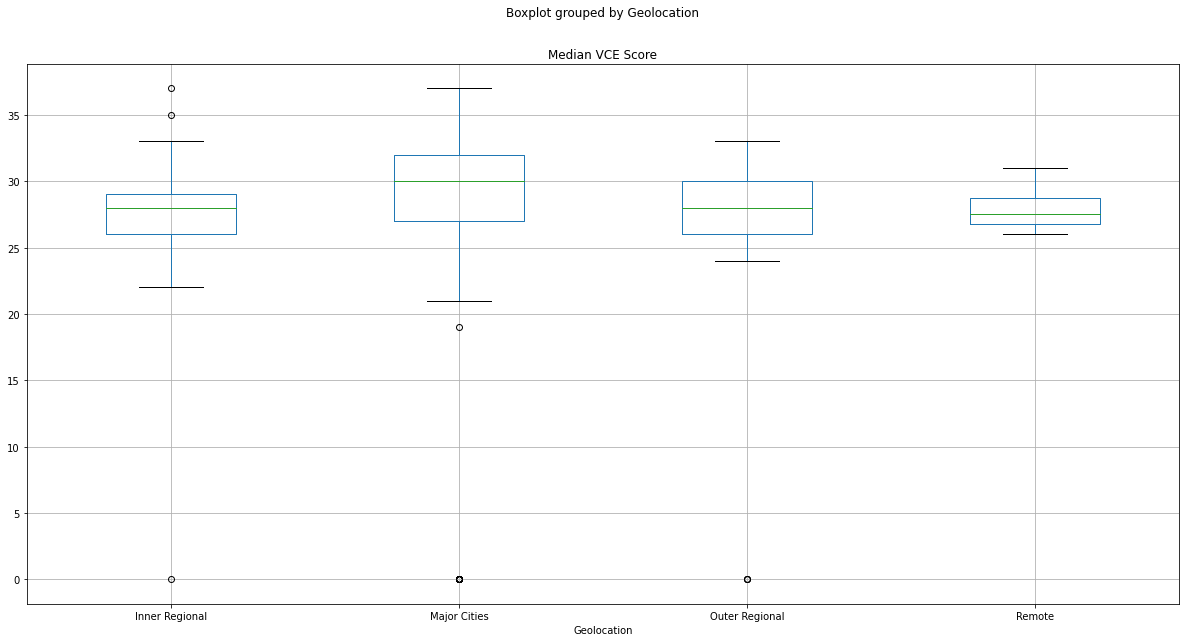

In [8]:
# Create a boxplot to compare means
school_df.boxplot("Median VCE Score", by="Geolocation", figsize=(20, 10))

# We may need to remove the Zeros from this in order not to skew the data??

In [9]:
school_df.dtypes

School Name                        object
Suburb                             object
Type                               object
Sector                             object
Geolocation                        object
Latitude                          float64
Longitude                         float64
VET Certs With 2021 Enrolments      int64
% Applying for Tertiary Study     float64
Median VCE Score                    int64
VCE 40+ %                         float64
dtype: object